# Exploration for the Iris Flower Classification dataset

In [14]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# You can also access feature names and target names
feature_names = iris.feature_names
target_names = iris.target_names

print("Feature Names:", feature_names)
print("Target Names:", target_names)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


In [ ]:
# Check the shape of the dataset features
X.shape

(150, 4)

In [ ]:
# See how the actual data looks like
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [11]:
type(X)

numpy.ndarray

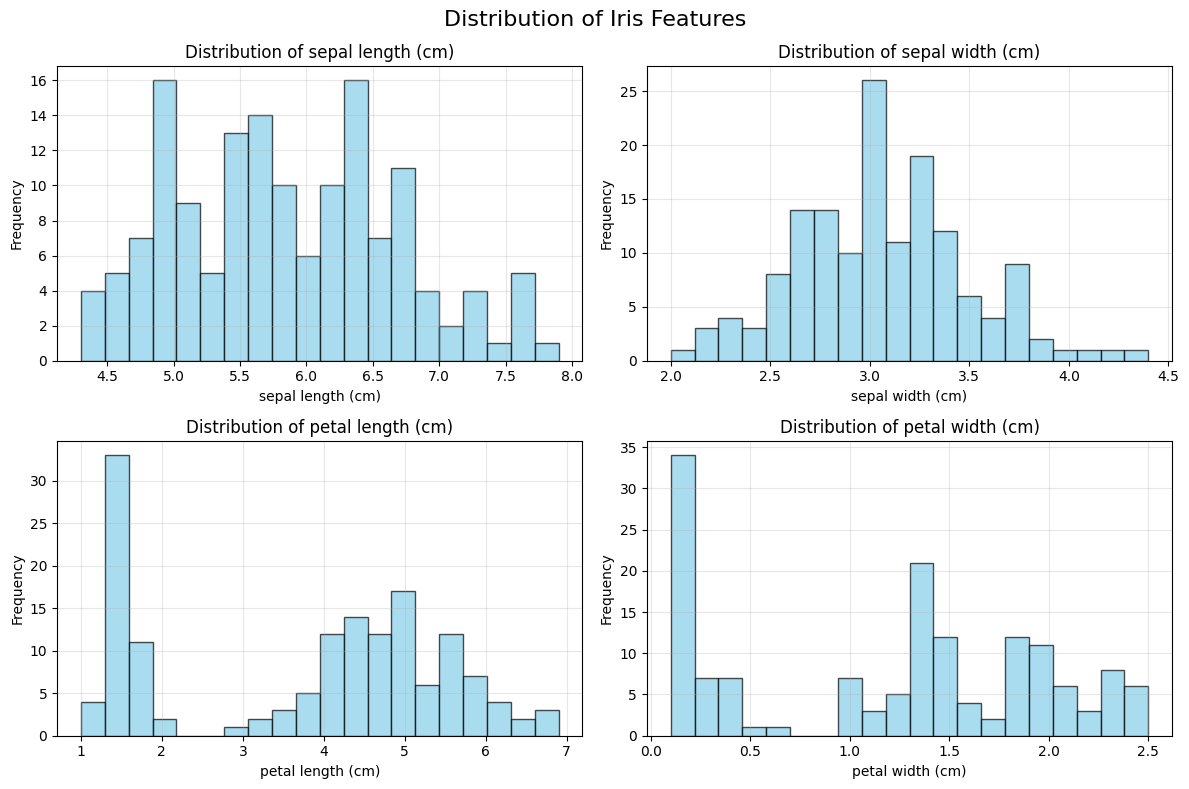

In [ ]:
# Histograms for all features
import matplotlib.pyplot as plt
import numpy as np

# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Iris Features', fontsize=16)

# Flatten axes for easier iteration
axes = axes.ravel()

# Create histograms for each feature
for i, feature_name in enumerate(feature_names):
    axes[i].hist(X[:, i], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature_name}')
    axes[i].set_xlabel(feature_name)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

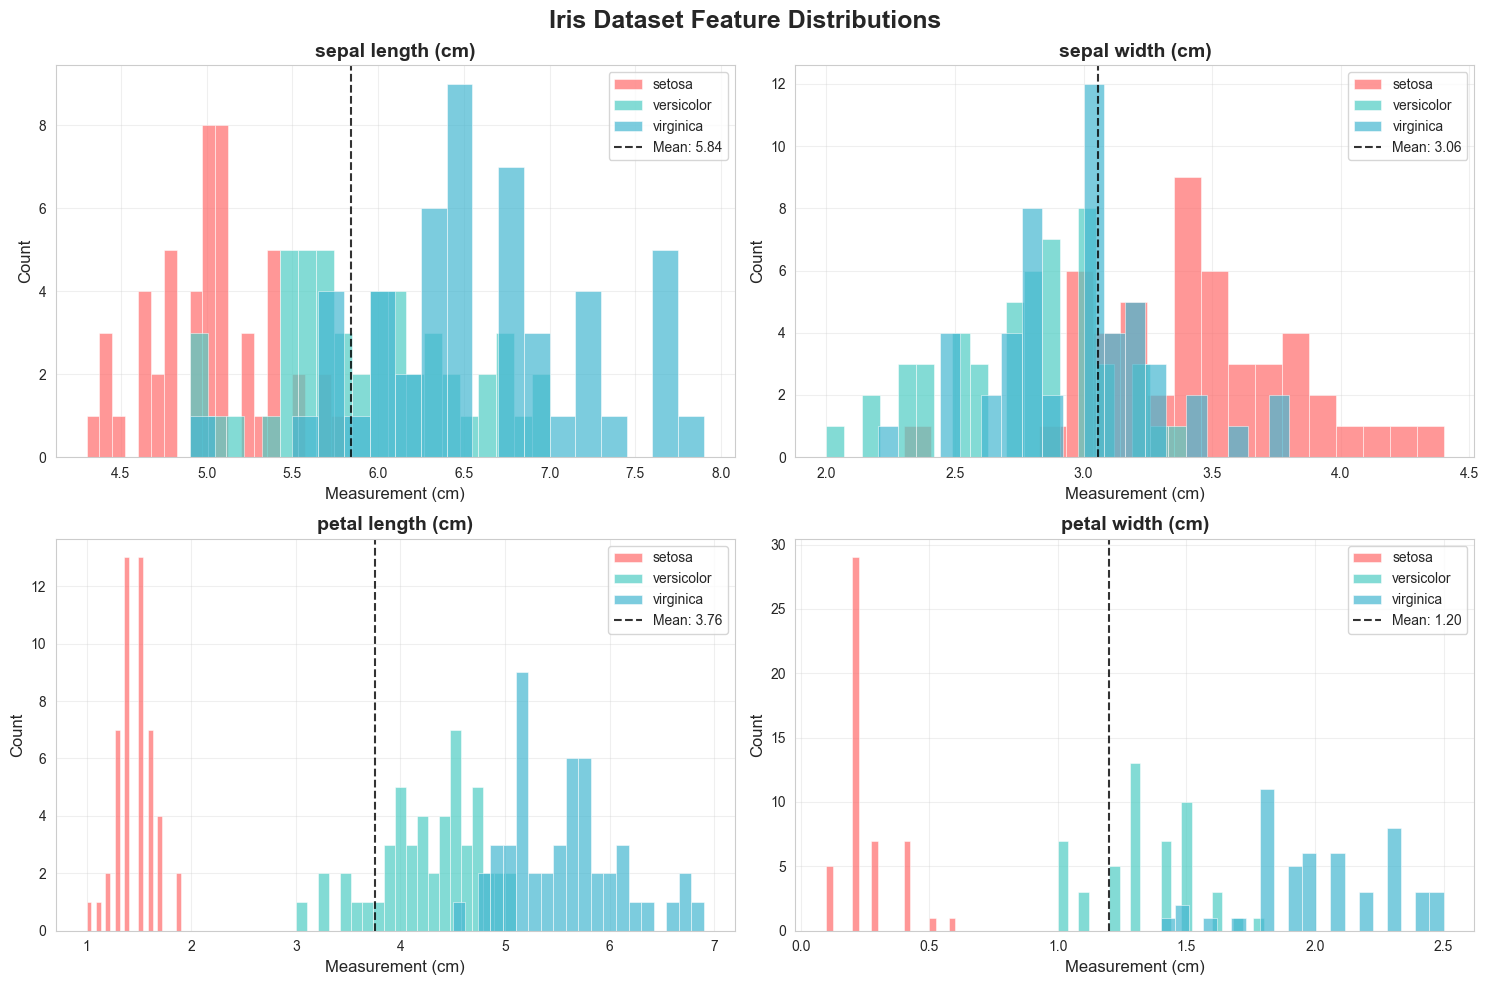

In [23]:

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Iris Dataset Feature Distributions', fontsize=18, fontweight='bold')

# Colors for each species
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
species_names = ['setosa', 'versicolor', 'virginica']

for i, (feature_name, ax) in enumerate(zip(feature_names, axes.ravel())):
    # Create histogram for each species
    for j, species_name in enumerate(species_names):
        species_data = X[y == j, i]
        ax.hist(species_data, bins=20, alpha=0.7, 
               label=species_name, color=colors[j], edgecolor='white', linewidth=0.5)
    
    ax.set_title(f'{feature_name}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Measurement (cm)', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Add some statistics
    mean_val = np.mean(X[:, i])
    ax.axvline(mean_val, color='black', linestyle='--', alpha=0.8, 
              label=f'Mean: {mean_val:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

In [24]:
# First, let's create a DataFrame for easier seaborn plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

# Set seaborn style for better-looking plots
sns.set_style("whitegrid")

# Define custom colors for consistency
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Red, Teal, Blue
custom_palette = sns.color_palette(colors)

<Figure size 1200x1200 with 0 Axes>

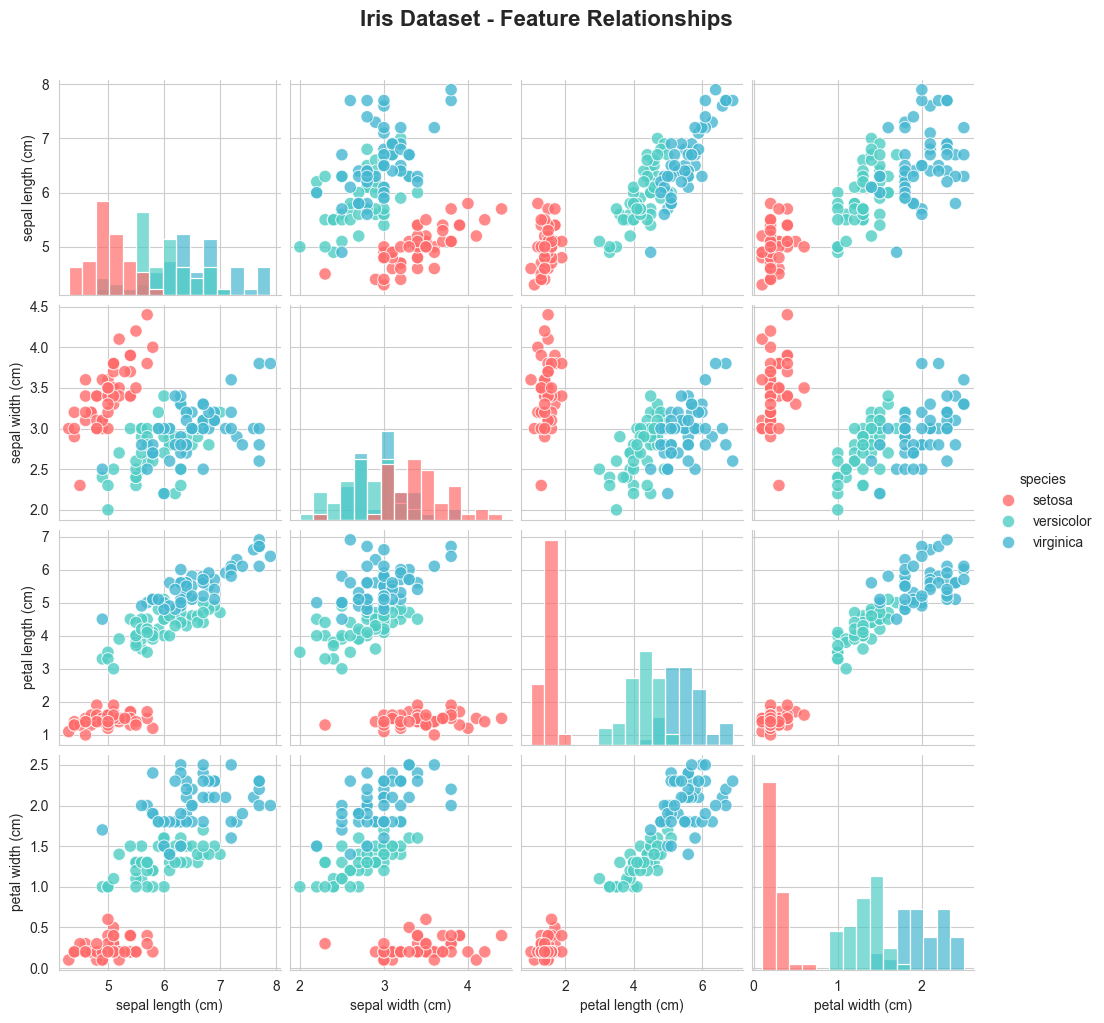

In [ ]:
# Seaborn pairplot (all feature combinations)
plt.figure(figsize=(12, 12))
pair_plot = sns.pairplot(df, hue='species', palette=custom_palette, 
                        diag_kind='hist', diag_kws={'alpha': 0.7, 'bins': 15},
                        plot_kws={'s': 80, 'alpha': 0.8})
pair_plot.fig.suptitle('Iris Dataset - Feature Relationships', y=1.02, 
                      fontsize=16, fontweight='bold')
pair_plot.fig.subplots_adjust(top=0.95)
plt.show()

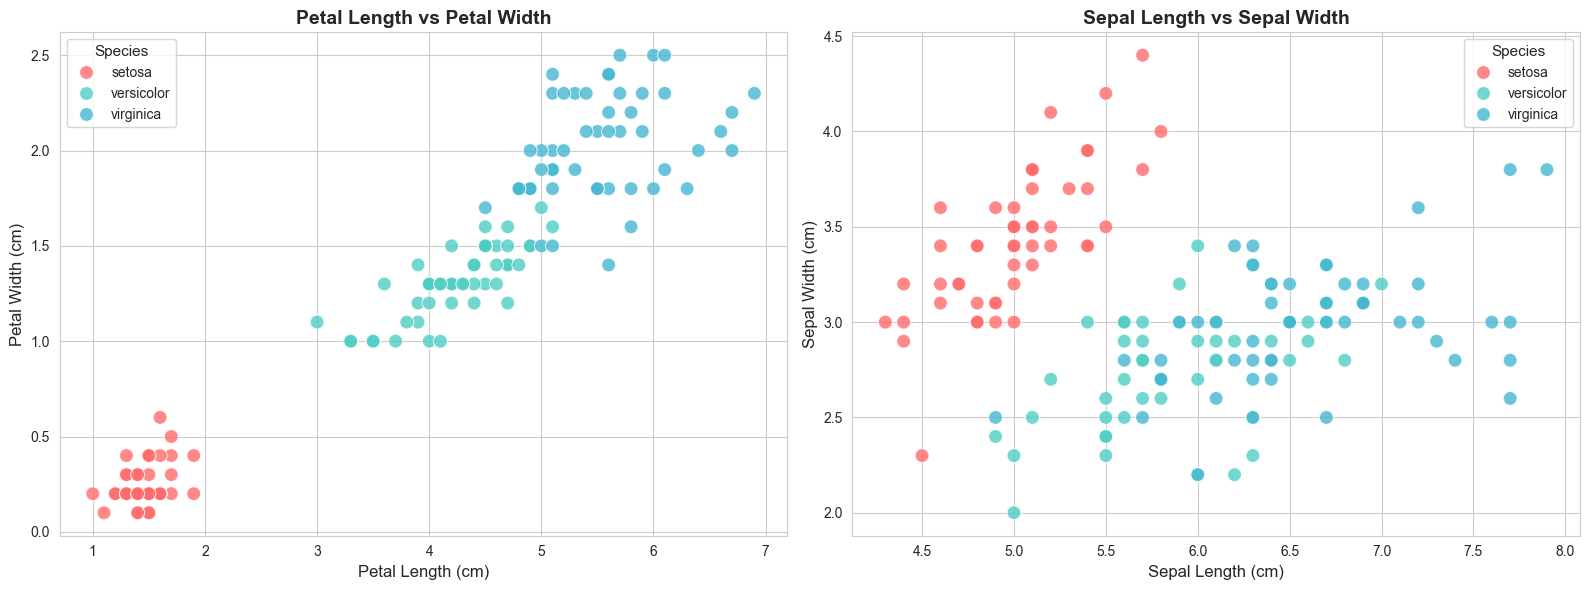

In [ ]:
# Best separating features comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Petal measurements
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', 
               hue='species', s=100, alpha=0.8, ax=ax1, palette=custom_palette)
ax1.set_title('Petal Length vs Petal Width', fontsize=14, fontweight='bold')
ax1.set_xlabel('Petal Length (cm)', fontsize=12)
ax1.set_ylabel('Petal Width (cm)', fontsize=12)
ax1.legend(title='Species', title_fontsize=11, fontsize=10)

# Sepal measurements
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', 
               hue='species', s=100, alpha=0.8, ax=ax2, palette=custom_palette)
ax2.set_title('Sepal Length vs Sepal Width', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sepal Length (cm)', fontsize=12)
ax2.set_ylabel('Sepal Width (cm)', fontsize=12)
ax2.legend(title='Species', title_fontsize=11, fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

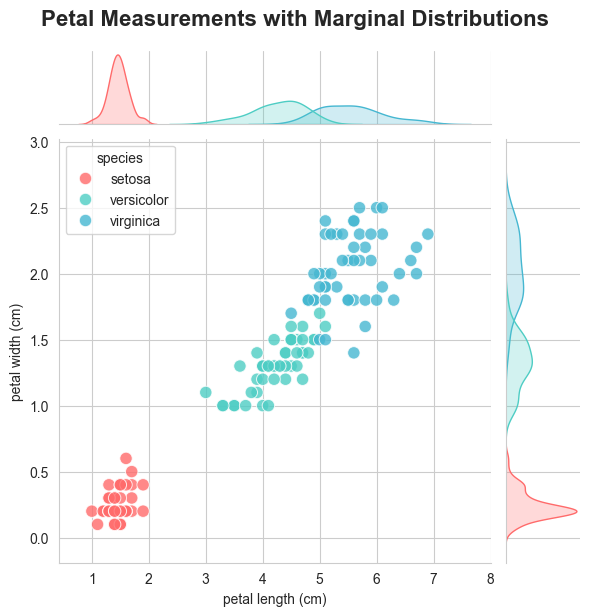

In [ ]:
# Joint plot with marginal distributions
plt.figure(figsize=(12, 10))
joint_plot = sns.jointplot(data=df, x='petal length (cm)', y='petal width (cm)', 
                          hue='species', palette=custom_palette, s=80, alpha=0.8)
joint_plot.fig.suptitle('Petal Measurements with Marginal Distributions', 
                       y=1.02, fontsize=16, fontweight='bold')
joint_plot.fig.subplots_adjust(top=0.95)
plt.show()

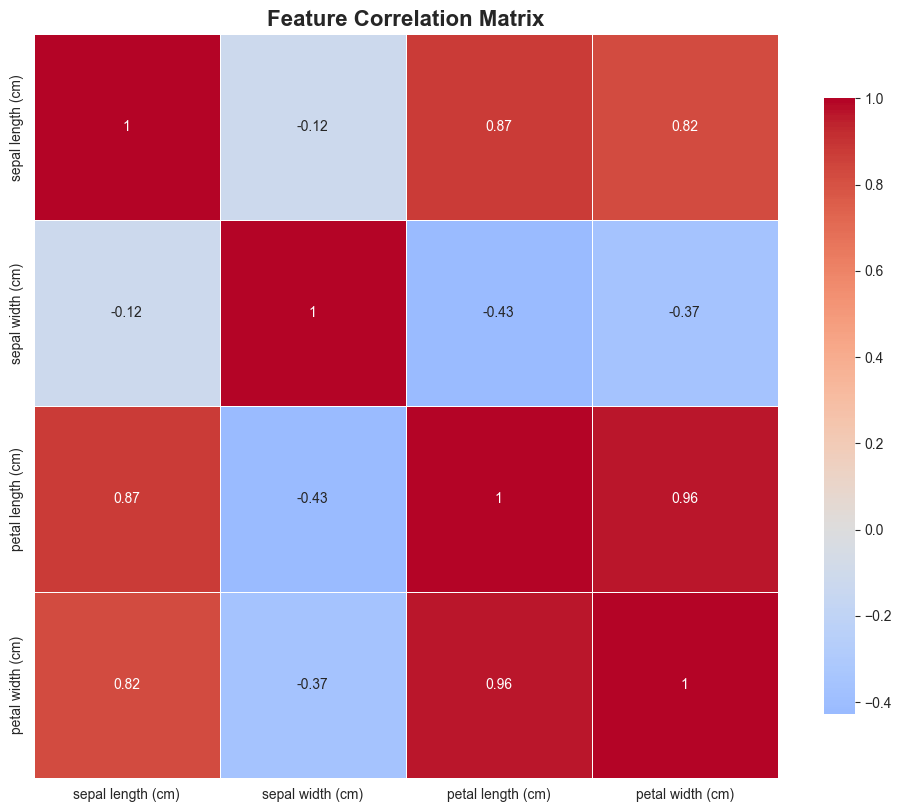


Scatterplot Analysis:
--------------------------------------------------
• Petal measurements (length & width) show the clearest separation between species
• Setosa is completely separable from the other two species
• Versicolor and Virginica have some overlap but are mostly separable
• Sepal measurements show more overlap between species
• The combination of petal length and width is the best for classification


In [ ]:
# Correlation heatmap with scatterplots
plt.figure(figsize=(12, 10))
correlation_matrix = df.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

print("\nScatterplot Analysis:")
print("-" * 50)
print("• Petal measurements (length & width) show the clearest separation between species")
print("• Setosa is completely separable from the other two species")
print("• Versicolor and Virginica have some overlap but are mostly separable")
print("• Sepal measurements show more overlap between species")
print("• The combination of petal length and width is the best for classification")

# Model training and evaluation

In [69]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

In [ ]:
# Train a Dummy Classifier to see how a weak classifier would perform as a baseline
from sklearn.metrics import accuracy_score

model = DummyClassifier(strategy="most_frequent")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3


In [ ]:
# Train a Percenptron Classifier to see how another weak classifier would perform as a baseline
from sklearn.metrics import accuracy_score

model = Perceptron(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8


In [65]:
# Train a classification model
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [67]:
# Train a classification model
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [68]:
# Train a classification model
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0
